In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### For the "Median value of owner-occupied homes" provide a boxplot:


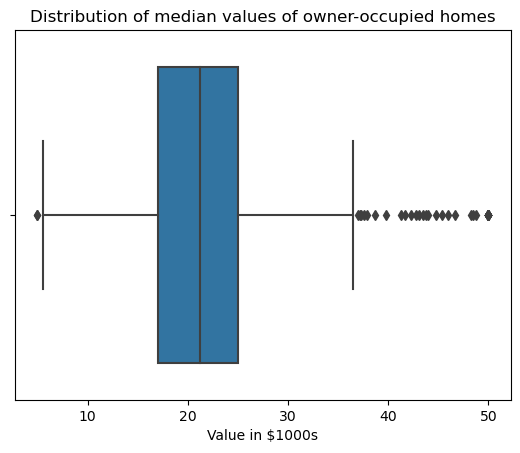

In [9]:
#boston_df.boxplot(['MEDV'])
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.xlabel("Value in $1000s")
plt.title("Distribution of median values of owner-occupied homes")
plt.show()

### Provide a  bar plot for the Charles river variable:


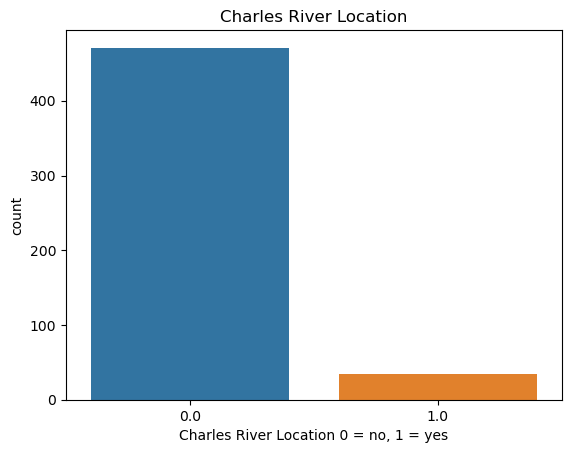

In [8]:
sns.countplot(x = "CHAS", data = boston_df)
plt.xlabel("Charles River Location 0 = no, 1 = yes")
plt.title("Charles River Location")
plt.show()


### Provide a boxplot for the MEDV variable vs the AGE variable:


In [91]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years & younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 & 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years & older'

In [103]:
#increase size of plot to fit three boxplots and labels
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.set_style("whitegrid")

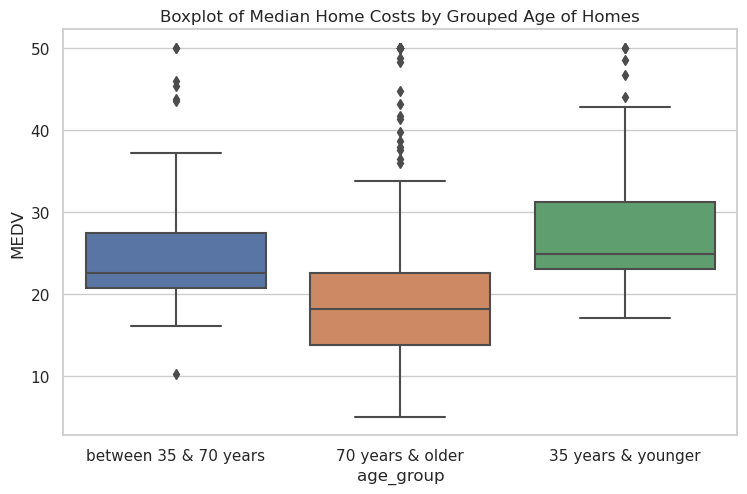

In [104]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
ax = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
plt.title("Boxplot of Median Home Costs by Grouped Age of Homes")
plt.show()

In [68]:
#resize plots
sns.set(rc={'figure.figsize':(5.27,5.27)})
sns.set_style("whitegrid")

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town:


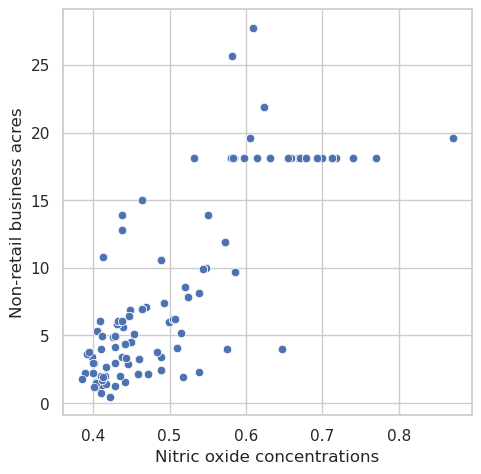

In [49]:
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
plt.xlabel("Nitric oxide concentrations")
plt.ylabel("Non-retail business acres")
plt.title("Boxplot of Median Home Costs by Grouped Age of Homes")
plt.show()

There appears to be a positive linear relationship between the nitric oxide concentrations in an area and the number of non-retail business acres.

### Create a histogram for the pupil to teacher ratio variable:

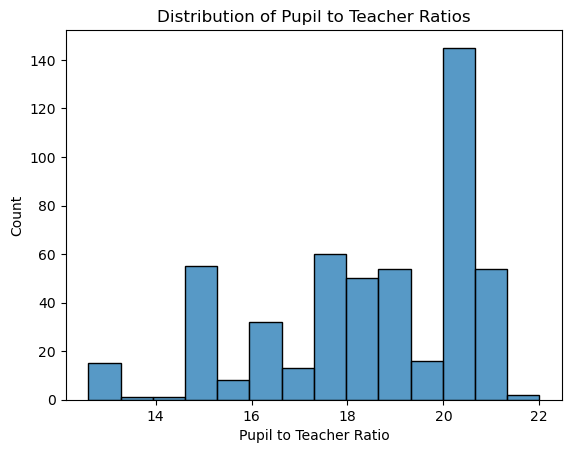

In [16]:
sns.histplot(boston_df["PTRATIO"])
plt.xlabel("Pupil to Teacher Ratio")
plt.title("Distribution of Pupil to Teacher Ratios")
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypothesis

$H\_0:$ 
  µ_1=µ_2  There is no difference in median value of houses bounded by the Charles river vs not. 

$H\_1:$  µ_1≠µ_2  There is a difference in median value of houses bounded by the Charles river vs not.

In [22]:
#test for equality of variance. 
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

𝐻0 is that the variances are equal. *p* < .05 so reject null hypothesis and assume unequal variance.

In [18]:
#T-test for independent samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

*p* is < .05 so we can reject the null hypothesis that the costs do not vary dependent on Charles River access. There is evidence that costs vary based on Charles River access. 

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Hypothesis

$H\_0:$ 
  µ_1=µ_2=µ_3  There is no difference in median value of houses based on year built. 

$H\_1:$  At least one of the means differ.
 

In [19]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years & younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 & 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years & older'

In [24]:
boston_df.age_group.value_counts() 

age_group
70 years & older         287
between 35 & 70 years    128
35 years & younger        91
Name: count, dtype: int64

In [29]:
#test for equality of variance. H0 is that the variances are equal. 
#p is greater than .05 so we accept null hypothesis of equal variance.

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years & younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 & 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years & older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [37]:
# separate the three samples (one for each age group) into a variable each.

thirtyfive_lower_med = boston_df[boston_df['age_group'] == '35 years & younger']['MEDV']
thirtyfive_fiftyseven_med = boston_df[boston_df['age_group'] == 'between 35 & 70 years']['MEDV']
seventy_older_med = boston_df[boston_df['age_group'] == '70 years & older']['MEDV']

In [38]:
#run one-way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_med, thirtyfive_fiftyseven_med, seventy_older_med)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**  Since the *p* value is less than 0.05 we can reject the null hypothesis and assume that there is a difference in at least one of the means.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis

$H\_0:$ 
  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 

$H\_1:$  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
 

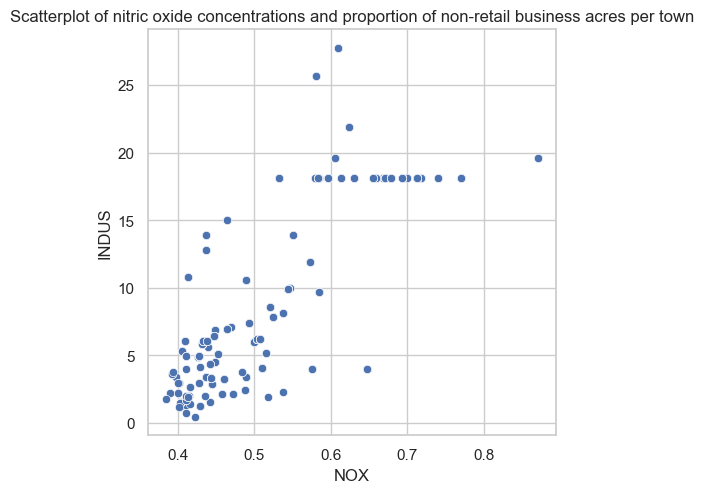

In [40]:
#scatterplot of relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
sns.set(rc={'figure.figsize':(5.27,5.27)})
sns.set_style("whitegrid")
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Scatterplot of nitric oxide concentrations and proportion of non-retail business acres per town")
plt.show()

There appears to be a positive linear relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

In [41]:
#run Pearson correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

**Conclusion:** *p* < 0.05 so we can reject the null hypothesis; there is sufficient evidence a positive linear relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

Hypothesis

$H\_0:$ There is no relationship between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes. 

$H\_1:$  There is a relationship between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes.
 


In [42]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        19:53:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** *p* < 0.05 there is evidence of correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes. However, R-squared is close to zero; the size of the correlation is small. 
